### CM4603 – Coursework 1 (Group)
#### November 2023

### Group: I

Name 1: Kasun Abeyweera |
IIT ID: 20211409 |
RGU ID: 2121842

Name 2: Sunera Udana |
IIT ID:   |
RGU ID: 2122099

Name 3: Rikzy Mohamed |
IIT ID:  |
RGU ID: 2122107

### Answer to Task 1

---

## **Dataset Description**

- **Size**: The dataset comprises **9,949 records**, each corresponding to a hotel review. Key features include:
  - **`Customer`**: Unique identifier of the reviewer.
  - **`text`**: Full text of the review.
  - **`title`**: A short summary of the review.
  - **`hotel_Name`**: Name of the hotel being reviewed.
  - **`numberOfReviews`**: Total number of reviews provided by the customer.
  - **`finalRating`**: Numerical rating on a scale from 1 to 5.

---

## **Initial Observations**

- **Hotels Reviewed**: The dataset contains reviews for **140 unique hotels**.
- **Review Distribution**:
  - Mean number of reviews per hotel: **71**.
  - The distribution of reviews per hotel shows a **skewed pattern**, ranging from **20 to 100 reviews per hotel**.

- **Textual Characteristics**:
  - **Total words**: **559,979**.
  - **Unique words**: **42,501**.
  - **Lexical Diversity**: **0.0759**.
  - Average review length: **56.28 words**.

---

## **Data Quality**

- **Missing Values**:
  - Only the `Customer` field has **48 missing entries**.
  - The `title` column has **1 missing value**.
  - All `text`, `hotel_Name`, and `finalRating` entries are complete.

- Non-standard characters (e.g., emojis) and punctuation were observed in the text.

---

## **Exploratory Data Analysis (EDA)**

### **1. Distribution of Review Lengths**

- The distribution of review lengths, measured in the number of words, indicates that most reviews are short and concise, with a **peak around 56 words**.

**Insights**:
- The data has a small proportion of unusually long reviews.


---

### **2. Frequent Words in Reviews**



- **Common Words**:
  - Frequently used words include **"hotel" , "staff" , "room" , "stay" and "food"**.
  - Frequently used Bi-grams include **"sri lanka" , "higly recommennd" , "staff friendly" , "room clean" and "stayed night"**.
  - Frequently used Tri-grams include **"staff friendly helpful" , "higly recommennd hotel" , "trip sri lanka"**.


---

### **3. Review rating distribution**

- The distribution of rating, measured from 1 -5, indicates that most reviews are in rate 5.

**Insights**:
- The data can be more lean towards the postive sentiments.

---

## **Tokenization Analysis**

To analyze and process text effectively, we compared five popular tokenizers based on speed, handling of emojis, and overall accuracy. The tokenizers were tested on the dataset for their token count, unique tokens, average tokens per review, and runtime.

| **Tokenizer**         | **Time (s)** | **Tokens** | **Unique Tokens** | **Tokens/Review** |
|------------------------|---------------|------------|--------------------|-------------------|
| `nltk_word_tokenize`   | **3.1539 s** | **890,557**| **45,807**         | **98.95**         |
| `treebank_tokenizer`   | **1.2277 s** | **841,292**| **53,487**         | **93.48**         |
| `whitespace_tokenizer` | **0.2121 s** | **788,738**| **66,384**         | **87.64**         |
| **`tweet_tokenizer`**  | **2.9873 s** | **895,349**| **44,976**         | **99.48**         |
| `spacy_tokenizer`      | **4660.25 s**| **916,500**| **43,709**         | **101.83**        |

---

### **Comparison and Selection**

#### **1. `nltk_word_tokenize`**
- Generated **45,807 unique tokens**.
- Runtime: **3.15 s**.
- Average tokens per review: **98.95**.
- Observations:
  - Balanced speed and token count.
  - Struggled with handling emojis and special characters.

#### **2. `treebank_tokenizer`**
- Generated **53,487 unique tokens**, slightly more than `nltk_word_tokenize`.
- Runtime: **1.22 s** (fastest of the advanced methods).
- Average tokens per review: **93.48**.
- Observations:
  - Handled punctuation better but still struggled with emojis and informal text.

#### **3. `whitespace_tokenizer`**
- Generated the **most unique tokens**: **66,384**.
- Runtime: **0.21 s** (fastest overall).
- Average tokens per review: **87.64**.
- Observations:
  - Over-split text, producing an unusually high unique token count.
  - Insufficient accuracy for rich, sentiment-heavy text.

#### **4. `TweetTokenizer`**
- Generated **44,976 unique tokens**, close to `nltk_word_tokenize`.
- Runtime: **2.98 s**.
- Average tokens per review: **99.48**.
- Observations:
  - Handled emojis, hashtags, and abbreviations effectively.
  - Balanced speed and tokenization accuracy.

#### **5. `SpaCy Tokenizer`**
- Generated **43,709 unique tokens** (least among methods).
- Runtime: **4,660 s** (significantly slower than others).
- Average tokens per review: **101.83**.
- Observations:
  - Most robust tokenization.
  - Computationally expensive, unsuitable for this dataset size.

---


---

### **Chosen Tokenizer: `TweetTokenizer`**

- **Reason for Selection**:
  - Balances speed and accuracy.
  - Effectively handles **emojis** and **special characters**, which are prevalent in hotel reviews.
  - Better for informal text handling.


In [2]:
# Import libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, TreebankWordTokenizer, WhitespaceTokenizer, TweetTokenizer
from nltk.stem import WordNetLemmatizer
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import time

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the dataset
data = pd.read_csv('master-dataset.csv')

print("Initial Data Shape:", data.shape)
print("Missing Values per Column:\n", data.isnull().sum())
data.dropna(subset=['text'], inplace=True)
print("Data Shape after Dropping Missing Text:", data.shape)

# Define tokenizer evaluation function
def evaluate_tokenizer_performance(tokenizers, text_samples):
    results = []
    for name, tokenizer in tokenizers.items():
        start_time = time.time()
        tokens = [tokenizer(text) for text in text_samples]
        duration = time.time() - start_time
        total_tokens = sum(len(tok) for tok in tokens)
        unique_tokens = len(set(word for tok in tokens for word in tok))
        results.append({
            'Tokenizer': name,
            'Time (s)': round(duration, 4),
            'Total Tokens': total_tokens,
            'Unique Tokens': unique_tokens,
            'Tokens per Review': round(total_tokens / len(text_samples), 2)
        })
    return pd.DataFrame(results)

text_samples = data['text'].sample(10, random_state=42).tolist()
tokenizers = {
    'nltk_word_tokenize': lambda x: word_tokenize(x.lower()),
    'treebank_tokenizer': lambda x: TreebankWordTokenizer().tokenize(x.lower()),
    'whitespace_tokenizer': lambda x: WhitespaceTokenizer().tokenize(x.lower()),
    'tweet_tokenizer': lambda x: TweetTokenizer().tokenize(x.lower()),
    'spacy_tokenizer': lambda x: [token.text.lower() for token in spacy.load("en_core_web_sm")(x)]
}

results_df = evaluate_tokenizer_performance(tokenizers, text_samples)

print("\nTokenizer Performance:")
display(results_df)

sample_text = '''Wonderful experience 😍 friendly staff, delicious food, beautiful view. And their have arranged our 3 meals in 3 beautiful location with breathtaking view, and we loved this experience , and should mention the trekking experience we had and we went to a beautiful waterfall and that was surprise to us and this amazing place is highly recommended.'''
def tokenize_methods(text):
    tokenizations = {}
    tokenizations['word_tokenize'] = word_tokenize(text.lower())
    tokenizations['treebank'] = TreebankWordTokenizer().tokenize(text.lower())
    tokenizations['whitespace'] = WhitespaceTokenizer().tokenize(text.lower())
    tokenizations['tweet_tokenizer'] = TweetTokenizer().tokenize(text.lower())
    tokenizations['spacy'] = [token.text.lower() for token in spacy.load("en_core_web_sm")(text)]
    return tokenizations

print("\nTokenization Examples:")
for method, tokens in tokenize_methods(sample_text).items():
    print(f"{method}: {tokens[:20]}...")

tweet_tokenizer = TweetTokenizer()
def preprocess_text(text):
    sentences = sent_tokenize(text)
    words = [tweet_tokenizer.tokenize(sentence.lower()) for sentence in sentences]
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_words = [
        [lemmatizer.lemmatize(word) for word in sentence if word not in stop_words and word.isalpha()]
        for sentence in words
    ]
    return ' '.join(word for sentence in processed_words for word in sentence)

data['cleaned_text'] = data[['title', 'text']].apply(lambda row: preprocess_text(f"{row['title']} {row['text']}"), axis=1)
print("\nCleaned Data Sample:")
display(data[['title', 'text', 'cleaned_text']].head())

# Basic dataset statistics
print(f"\nTotal hotels: {data['hotel_Name'].nunique()}")
print(f"Total words: {sum(len(x.split()) for x in data['cleaned_text'])}")
print(f"Unique words: {len(set(' '.join(data['cleaned_text']).split()))}")

# Number of reviews per hotel
reviews_per_hotel = data.groupby('hotel_Name').size()
print("\nNumber of reviews per hotel (Summary):")
print(reviews_per_hotel.describe())

all_words = [word for review in data['cleaned_text'] for word in review.split()]
unique_words = set(all_words)

# Compute lexical diversity
lexical_diversity = len(unique_words) / len(all_words)
print(f"Lexical Diversity: {lexical_diversity:.4f}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Initial Data Shape: (9949, 6)
Missing Values per Column:
 Customer           48
text                0
title               1
hotel_Name          0
numberOfReviews     0
finalRating         0
dtype: int64
Data Shape after Dropping Missing Text: (9949, 6)

Tokenizer Performance:


,Tokenizer,Time (s),Total Tokens,Unique Tokens,Tokens per Review
0,nltk_word_tokenize,0.0446,1256,562,125.6
1,treebank_tokenizer,0.0042,1188,575,118.8
2,whitespace_tokenizer,0.0008,1102,595,110.2
3,tweet_tokenizer,0.0150,1262,563,126.2
4,spacy_tokenizer,10.4937,1273,563,127.3



Tokenization Examples:
word_tokenize: ['wonderful', 'experience', '😍', 'friendly', 'staff', ',', 'delicious', 'food', ',', 'beautiful', 'view', '.', 'and', 'their', 'have', 'arranged', 'our', '3', 'meals', 'in']...
treebank: ['wonderful', 'experience', '😍', 'friendly', 'staff', ',', 'delicious', 'food', ',', 'beautiful', 'view.', 'and', 'their', 'have', 'arranged', 'our', '3', 'meals', 'in', '3']...
whitespace: ['wonderful', 'experience', '😍', 'friendly', 'staff,', 'delicious', 'food,', 'beautiful', 'view.', 'and', 'their', 'have', 'arranged', 'our', '3', 'meals', 'in', '3', 'beautiful', 'location']...
tweet_tokenizer: ['wonderful', 'experience', '😍', 'friendly', 'staff', ',', 'delicious', 'food', ',', 'beautiful', 'view', '.', 'and', 'their', 'have', 'arranged', 'our', '3', 'meals', 'in']...
spacy: ['wonderful', 'experience', '😍', 'friendly', 'staff', ',', 'delicious', 'food', ',', 'beautiful', 'view', '.', 'and', 'their', 'have', 'arranged', 'our', '3', 'meals', 'in']...

Cleaned Da

,title,text,cleaned_text
0,"Fantastic, comfortable experience",I had a wonderful stay at Colombo Court Hotel ...,fantastic comfortable experience wonderful sta...
1,Great stay! Gorgeous authentic Sri Lankan Expe...,The staff were incredibly welcoming and attent...,great stay gorgeous authentic sri lankan exper...
2,Boutique hotel of all,"Always a peace heaven when in Colombo 3, perfe...",boutique hotel always peace heaven colombo per...
3,A boutique hotel like home,The room was spacious. The service personnel w...,boutique hotel like home room spacious service...
4,Excellent location and friendly staff,Good hotel and nice room. Good value for money...,excellent location friendly staff good hotel n...



Total hotels: 140
Total words: 559979
Unique words: 42501

Number of reviews per hotel (Summary):
count    140.000000
mean      71.064286
std       27.113460
min       20.000000
25%       50.000000
50%       60.000000
75%      100.000000
max      100.000000
dtype: float64
Lexical Diversity: 0.0759


## EDA

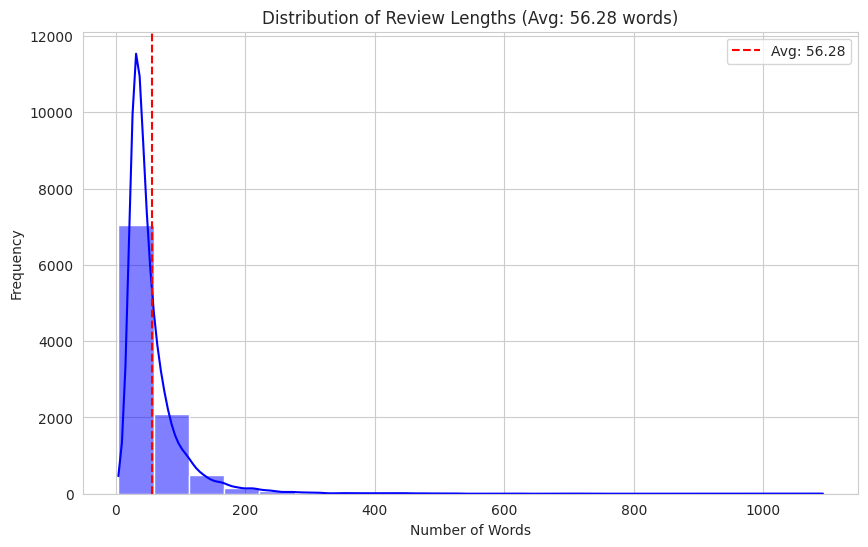

In [7]:
# Histogram of review lengths
data['review_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))

# Calculate average review length
average_review_length = data['review_length'].mean()

# Plot histogram of review lengths
sns.histplot(data['review_length'], bins=20, kde=True, color='blue')
plt.title(f'Distribution of Review Lengths (Avg: {average_review_length:.2f} words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.axvline(average_review_length, color='red', linestyle='--', label=f'Avg: {average_review_length:.2f}')
plt.legend()
plt.show()

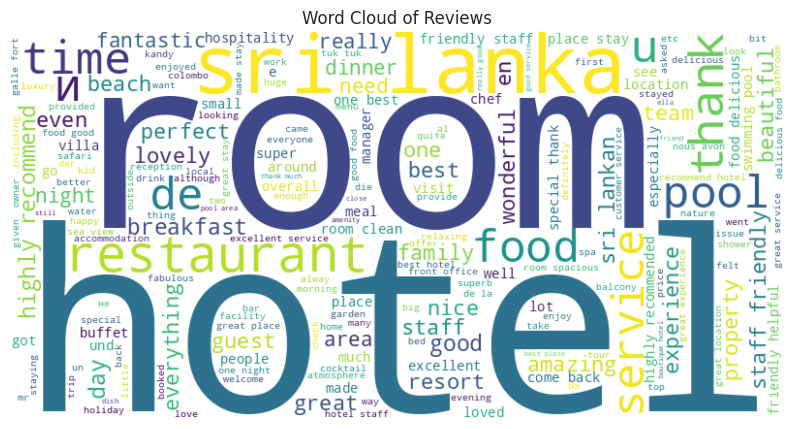

In [6]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

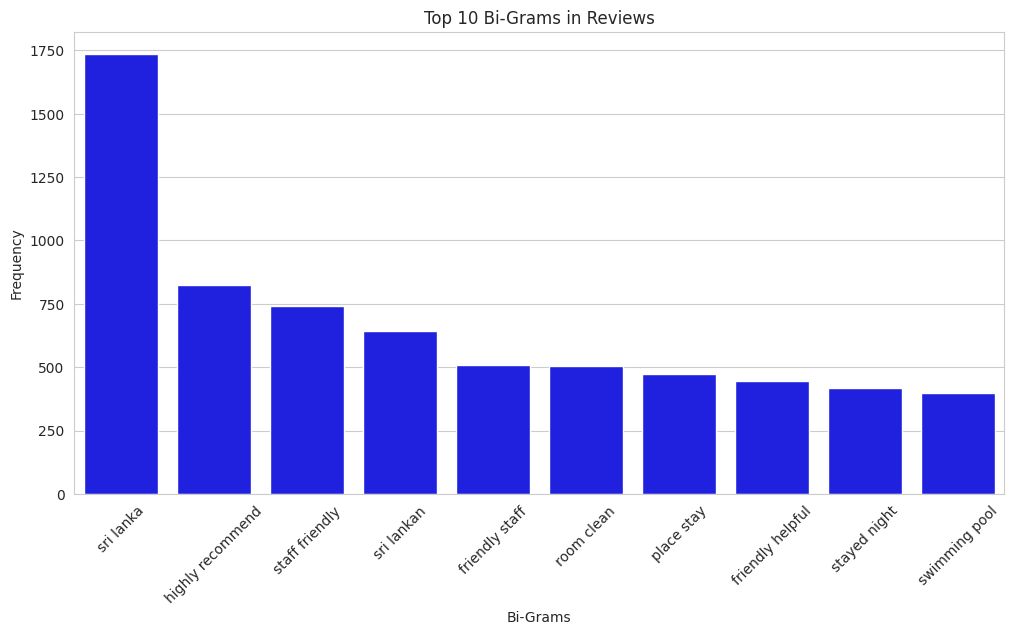

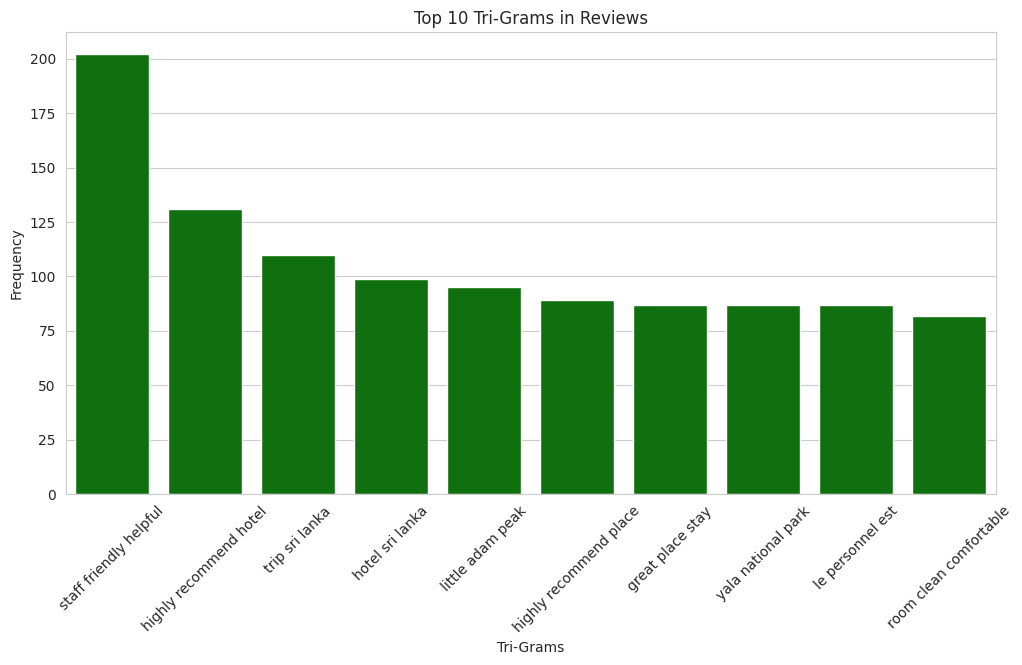

In [8]:
# Bi-Gram Analysis
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bi_grams = vectorizer.fit_transform(data['cleaned_text'])
bi_gram_counts = pd.DataFrame(bi_grams.sum(axis=0), columns=vectorizer.get_feature_names_out(), index=['count']).T
bi_gram_counts = bi_gram_counts.sort_values(by='count', ascending=False).head(10)

# Visualize Bi-Grams
plt.figure(figsize=(12, 6))
sns.barplot(x=bi_gram_counts.index, y=bi_gram_counts['count'], color='blue')
plt.title("Top 10 Bi-Grams in Reviews")
plt.xlabel("Bi-Grams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Tri-Gram Analysis
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3), stop_words='english')
tri_grams = vectorizer_trigram.fit_transform(data['cleaned_text'])
tri_gram_counts = pd.DataFrame(tri_grams.sum(axis=0), columns=vectorizer_trigram.get_feature_names_out(), index=['count']).T
tri_gram_counts = tri_gram_counts.sort_values(by='count', ascending=False).head(10)

# Visualize Top Tri-Grams
plt.figure(figsize=(12, 6))
sns.barplot(x=tri_gram_counts.index, y=tri_gram_counts['count'], color='green')
plt.title("Top 10 Tri-Grams in Reviews")
plt.xlabel("Tri-Grams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

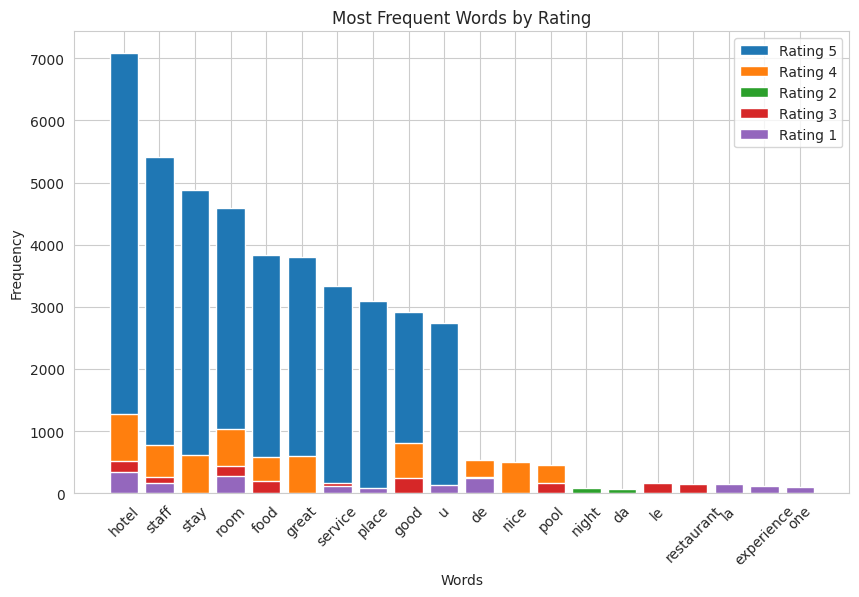

<ipython-input-10-8cf5750200c0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='finalRating', data=data, palette='viridis')


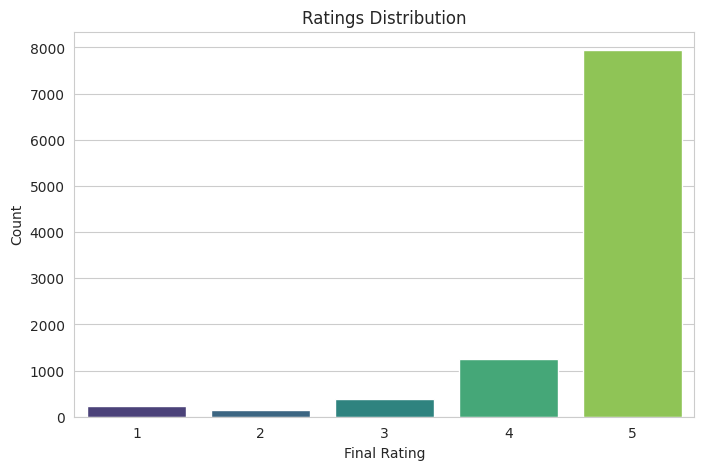

In [10]:
if 'finalRating' in data.columns:
    plt.figure(figsize=(10, 6))
    for rating in data['finalRating'].unique():
        words_in_rating = ' '.join(data[data['finalRating'] == rating]['cleaned_text']).split()
        word_counts = Counter(words_in_rating)
        most_common = word_counts.most_common(10)
        words, counts = zip(*most_common)
        plt.bar(words, counts, label=f'Rating {rating}')
    plt.title('Most Frequent Words by Rating')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Distribution of Ratings per Hotel
plt.figure(figsize=(8, 5))
sns.countplot(x='finalRating', data=data, palette='viridis')
plt.title('Ratings Distribution')
plt.xlabel('Final Rating')
plt.ylabel('Count')
plt.show()


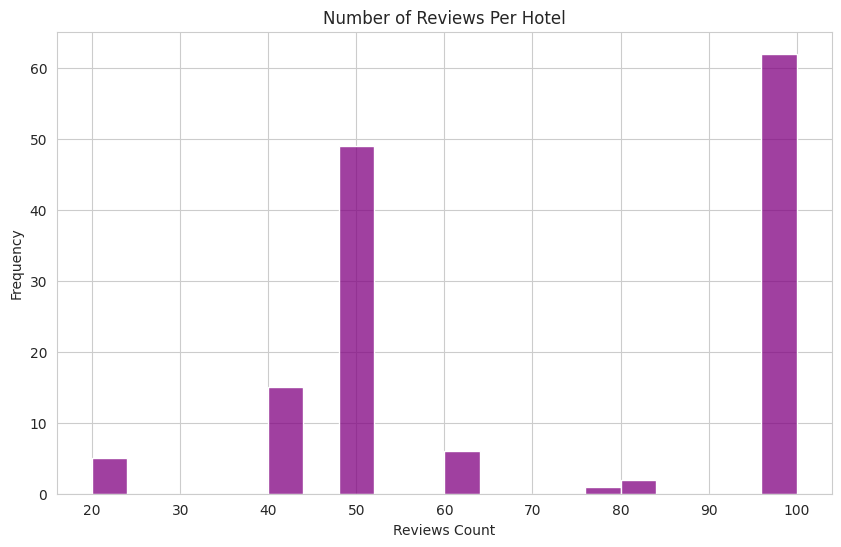


Preprocessed dataset saved as 'preprocessed_dataset.csv'.


In [11]:
# Distribution of Reviews Per Hotel
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_hotel, bins=20, kde=False, color='purple')
plt.title('Number of Reviews Per Hotel')
plt.xlabel('Reviews Count')
plt.ylabel('Frequency')
plt.show()

# Save preprocessed dataset
data.to_csv('preprocessed_dataset.csv', index=False)
print("\nPreprocessed dataset saved as 'preprocessed_dataset.csv'.")

### Answer to Task 2

### Dataset Description

#### Raw Classification Dataset
- **Dimensions**:  
  The raw dataset contains the following columns with 9949 rows:  
  - `Customer`: Identifier for the customer who provided the review.  
  - `text`: The full review text written by the customer.  
  - `title`: Title of the review.  
  - `hotel_Name`: Name of the hotel being reviewed.  
  - `numberOfReviews`: Number of reviews for the hotel (aggregated from all users).  
  - `finalRating`: The rating given by the user (e.g., 1 to 5).  
  - `cleaned_text`: Processed version of the `text` field after cleaning.  
  - `review_length`: The number of words in the cleaned review text.  

- **Dataset Preprocessing steps included**
- The dataset was preprocessed to clean and normalize the text for analysis:
  - Combined the `title` and `text` fields into a unified `cleaned_text` column.
  - Removed stopwords and applied lemmatization to ensure uniformity.
  - Tokenized the text using the **TweetTokenizer** to handle emojis, punctuation, and informal text effectively.

- **Classes for Classification**:  
  We performed **ternary classification** into three sentiment categories:  
  - `positive`  
  - `negative`  
  - `neutral`  

- **Feature Extraction Techniques**:  
  - **Sentiment Classification**: Applied three different sentiment classifiers:
    - VADER Sentiment Analysis.
    - Bing Liu's Lexicon-based method.
    - TextBlob Sentiment Analysis.
  - **Majority Voting**: Combined the outputs from the classifiers to establish the `ground_truth_sentiment` for each review.
  - **Agreement Check**: Added an `agreement` column to measure the consistency between classifier outputs.

### Ground Truth Generation: Documentation and Validation

#### Process for Determining Ground Truth
1. **Classifier Selection**:  
   To establish the sentiment ground truth, three sentiment classifiers were chosen:
   - **VADER Sentiment Analysis**: A lexicon and rule-based sentiment analysis tool tailored for social media and review text.
   - **Bing Liu's Lexicon**: A sentiment lexicon with lists of positive and negative words for domain-independent sentiment analysis.
   - **TextBlob Sentiment Analysis**: A polarity-based sentiment analysis tool that uses text processing techniques to determine sentiment.

2. **Majority Voting Mechanism**:  
   - Each review's sentiment was classified as `positive`, `negative`, or `neutral` by all three classifiers.  
   - The **final sentiment label (`ground_truth_sentiment`)** was assigned based on **majority voting**:
     - If two or more classifiers agreed on a sentiment, that sentiment was chosen.

3. **Agreement Levels**:  
   - A column named `agreement` was added to measure consistency among classifiers.
   - High agreement levels indicate stronger confidence in the ground truth sentiment.

---

#### Justification of the Ground Truth Methodology
1. **Combining Multiple Classifiers**:  
   - Using multiple classifiers ensures robustness in sentiment determination by leveraging different methods:
     - VADER: Excels in handling polarity and negation in texts.
     - Bing Liu Lexicon: Provides a domain-independent approach with established word lists.
     - TextBlob: Adds polarity-based precision for nuanced reviews.
   - This mitigates the limitations of any single classifier.

2. **Majority Voting**:  
   - Provides a simple yet effective way to integrate multiple perspectives into a single sentiment label.
   - By relying on consensus, it minimizes the impact of potential biases or errors from individual classifiers.

3. **Granularity of Sentiment Classes**:  
   - Ternary classification (`positive`, `negative`, `neutral`) captures neutral opinions, which are significant in hotel reviews.
   - This is justified over binary classification (`positive` and `negative`) to retain nuanced feedback, important for understanding customer experiences.

---

#### Validation of Ground Truth
1. **Agreement Analysis**:  
   - Analyzed the `agreement` column to ensure high consistency across classifiers.
   - Reviews with low agreement were inspected to assess potential classification ambiguities.

2. **Distribution Analysis**:  
   - The distribution of `ground_truth_sentiment` labels was plotted to ensure balanced sentiment categories.
   - More positive reviews were observed . (8892)

3. **Comparison with Ratings**:  
   - The `ground_truth_sentiment` was cross-checked with numerical ratings (`finalRating`) to validate consistency:
     - High ratings (e.g., 4–5 stars) generally aligned with `positive` sentiment.
     - Low ratings (e.g., 1–2 stars) aligned with `negative` sentiment.
     - Mid-range ratings (e.g., 3 stars) often corresponded to `neutral` sentiment.




In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

# Download NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

try:
    data = pd.read_csv('preprocessed_dataset.csv')
    print("Dataset Loaded!")
    print(data.head())
except Exception as e:
    raise FileNotFoundError("Could not load the dataset. Please ensure 'preprocessed_dataset.csv' exists.") from e

sia = SentimentIntensityAnalyzer()

# Load Bing Liu Lexicon
try:
    positive_words = set(open('positive-words.txt').read().splitlines())
    negative_words = set(open('negative-words.txt').read().splitlines())
except Exception as e:
    raise FileNotFoundError(
        "Could not load Bing Liu Lexicon files. Ensure 'positive-words.txt' and 'negative-words.txt' exist.") from e


def clean_text(text):
    """Clean text by removing stopwords, punctuation, and converting to lowercase."""
    if not isinstance(text, str):
        return ""
    stop_words = set(stopwords.words('english'))
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    return " ".join(word for word in tokens if word not in stop_words)


def classify_vader(text):
    """Classify sentiment using VADER."""
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'


def classify_bing_liu(text):
    """Classify sentiment using Bing Liu's Lexicon."""
    tokens = nltk.word_tokenize(text)
    pos_count = sum(1 for word in tokens if word in positive_words)
    neg_count = sum(1 for word in tokens if word in negative_words)

    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'


def classify_textblob(text):
    """Classify sentiment using TextBlob."""
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


def majority_vote(votes):
    """Return the sentiment with the most votes."""
    return Counter(votes).most_common(1)[0][0]


data['cleaned_text'] = data['cleaned_text'].apply(clean_text)

print("Applying sentiment classifiers...")
data['vader_sentiment'] = data['cleaned_text'].apply(classify_vader)
data['bing_liu_sentiment'] = data['cleaned_text'].apply(classify_bing_liu)
data['textblob_sentiment'] = data['cleaned_text'].apply(classify_textblob)

# Determine ground truth sentiment via majority voting
data['ground_truth_sentiment'] = data.apply(
    lambda row: majority_vote([row['vader_sentiment'], row['bing_liu_sentiment'], row['textblob_sentiment']]),
    axis=1
)

# Ground Truth Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='ground_truth_sentiment', data=data, palette='viridis')
plt.title('Ground Truth Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Loaded!
             Customer                                               text  \
0          lauradog95  I had a wonderful stay at Colombo Court Hotel ...   
1           Rach-Marg  The staff were incredibly welcoming and attent...   
2              HED249  Always a peace heaven when in Colombo 3, perfe...   
3           tomasa317  The room was spacious. The service personnel w...   
4  Culture41710159424  Good hotel and nice room. Good value for money...   

                                               title  \
0                  Fantastic, comfortable experience   
1  Great stay! Gorgeous authentic Sri Lankan Expe...   
2                              Boutique hotel of all   
3                         A boutique hotel like home   
4              Excellent location and friendly staff   

                  hotel_Name  numberOfReviews  finalRating  \
0  Colombo Court Hotel & Spa             1340            5   
1  Colombo Court Hotel & Spa             1340            5   
2  C

FileNotFoundError: Could not load Bing Liu Lexicon files. Ensure 'positive-words.txt' and 'negative-words.txt' exist.

In [ ]:
# Agreement Levels Between Classifiers
data['agreement'] = data.apply(
    lambda row: len(set([row['vader_sentiment'], row['bing_liu_sentiment'], row['textblob_sentiment']])),
    axis=1
)
print("Agreement Levels:\n", data['agreement'].value_counts())

# Article Length Histogram
data['text_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(data['text_length'], bins=50, kde=True, color='blue')
plt.title('Article Length Distribution')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.show()

data.to_csv('ground_truth_sentiment_dataset.csv', index=False)
print("Ground truth sentiment dataset saved as 'ground_truth_sentiment_dataset.csv'")


### Final Feature Set Description

After classification and feature extraction, the dataset includes the following additional columns:
- **`vader_sentiment`**: Sentiment output from the VADER classifier.  
- **`bing_liu_sentiment`**: Sentiment output from Bing Liu's Lexicon.  
- **`textblob_sentiment`**: Sentiment output from TextBlob.  
- **`ground_truth_sentiment`**: Final sentiment label determined by majority voting.  
- **`agreement`**: Count of unique sentiments across the three classifiers for each review.  
- **`text_length`**: Length of the review text (in words) after cleaning.

#### Final Feature Set Shapes
- **Number of Rows**: Matches the original dataset size (one row per review).  
- **Number of Features**: Increased to include the sentiment analysis outputs and meta-information:
  - Original columns: `Customer`, `text`, `title`, `hotel_Name`, `numberOfReviews`, `finalRating`, `cleaned_text`, `review_length`.
  - Added columns: `vader_sentiment`, `bing_liu_sentiment`, `textblob_sentiment`, `ground_truth_sentiment`, `agreement`, `text_length`.  

#### Final Dataset example
| Customer      | Text                         | Hotel Name                | Final Rating | Cleaned Text       | Review Length | VADER Sentiment | Bing Liu Sentiment | TextBlob Sentiment | Ground Truth Sentiment | Agreement | Text Length |
|---------------|------------------------------|---------------------------|--------------|--------------------|---------------|-----------------|--------------------|--------------------|------------------------|-----------|-------------|
| lauradog95    | I had a wonderful stay...    | Colombo Court Hotel & Spa | 5            | fantastic...        | 39            | Positive        | Positive           | Positive           | Positive               | 1         | 39          |

### Answer to Task 3

### Feature Extraction Summary

In this project, we explored four distinct methods to extract meaningful features from the text data for sentiment analysis. These methods provide a balance between sparse and dense representations:

1. **Bag of Words (BoW):**  
   - **Key Hyperparameters:**  
     - `max_features=40000` to focus on the most frequent words and reduce computational cost.

2. **TF-IDF (Term Frequency-Inverse Document Frequency):**  
   - **Key Hyperparameters:**  
     - `max_features=40000` to capture essential vocabulary without overloading the model.

3. **Word2Vec:**   
   - **Key Hyperparameters:**  
     - `vector_size=300` to define the dimensionality of embeddings.  
     - `window=8` to consider a broader context for each word.  
     - `min_count=1` to include rare words in the model.  

4. **Doc2Vec:**  
   - **Key Hyperparameters:**  
     - `vector_size=300` for the embedding size.  
     - `window=8` for context size.  
     - `min_count=1` to include all words.         


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ground_truth_sentiment_dataset.csv')

# Bag of Words (BoW)
print("Extracting Bag of Words (BoW)...")
bow_vectorizer = CountVectorizer(max_features=40000)
bow_features = bow_vectorizer.fit_transform(data['cleaned_text'])
print(f"BoW Shape: {bow_features.shape}")
np.save('bow_features.npy', bow_features.toarray())

# TF-IDF
print("Extracting TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])
print(f"TF-IDF Shape: {tfidf_features.shape}")
np.save('tfidf_features.npy', tfidf_features.toarray())

# Word2Vec
print("Training Word2Vec...")
word2vec_model = Word2Vec(
    sentences=data['cleaned_text'].str.split(),
    vector_size=300,  # Size of word embeddings
    window=8,         # Context window size
    min_count=1,      # Minimum word frequency
    workers=4         # Number of threads
)
print("Generating Word2Vec document embeddings...")
word2vec_features = np.array([
    np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv] or
            [np.zeros(word2vec_model.vector_size)], axis=0)
    for text in data['cleaned_text']
])
print(f"Word2Vec Shape: {word2vec_features.shape}")
np.save('word2vec_features.npy', word2vec_features)

# Doc2Vec
print("Training Doc2Vec...")
tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(data['cleaned_text'])]
doc2vec_model = Doc2Vec(
    tagged_data,
    vector_size=300,  # Size of document embeddings
    window=8,         # Context window size
    min_count=1,      # Minimum word frequency
    workers=4,        # Number of threads
    epochs=50         # Increased epochs for better convergence
)
print("Generating Doc2Vec document embeddings...")
doc2vec_features = np.array([doc2vec_model.infer_vector(text.split()) for text in data['cleaned_text']])
print(f"Doc2Vec Shape: {doc2vec_features.shape}")
np.save('doc2vec_features.npy', doc2vec_features)

# Save all features into a single file for convenience
data.to_csv('feature_extracted_dataset.csv', index=False)
print("Features saved!")

# Visualize Word2Vec Features with t-SNE
print("Visualizing Word2Vec features...")
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(word2vec_features)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)
plt.title('Word2Vec Feature Visualization')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

### Answer to Task 4

## Justification for Using the Selected Non-Deep Learning Algorithms

1. **Logistic Regression (LR):**
   - Logistic Regression is a simple yet effective linear classifier, particularly well-suited for high-dimensional, sparse data like Bag of Words (BoW) and TF-IDF.
   - Its interpretability and ability to model probabilities make it a widely-used choice for text classification tasks.
   - LR is most effective when the decision boundary is linear and the data is reasonably separable, as seen in the results.

2. **Support Vector Machine (SVM):**
   - SVM excels in cases where the data is not perfectly separable, leveraging the concept of margin maximization.
   - By using a linear kernel, SVM efficiently handles high-dimensional data such as TF-IDF features, capturing nuanced boundaries between classes.
   - SVM's robustness against overfitting makes it a strong candidate for scenarios involving complex feature transformations.

3. **Random Forest (RF):**
   - Random Forest is an ensemble method that combines multiple decision trees to improve generalization and reduce variance.
   - RF works particularly well with dense vector representations like Word2Vec and Doc2Vec, as it can effectively capture the semantic relationships embedded in these features.
   - Its ability to avoid overfitting while delivering consistent performance on dense embeddings makes it a reliable choice.

4. **Naive Bayes (NB):**
   - Although NB was not applied to dense features like Word2Vec and Doc2Vec due to mathematical limitations, it performs efficiently on sparse features like BoW and TF-IDF.
   - NB's independence assumption aligns well with the nature of these feature extraction methods, delivering competitive results with minimal computational complexity.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load features
bow_features = np.load('bow_features.npy')
tfidf_features = np.load('tfidf_features.npy')
word2vec_features = np.load('word2vec_features.npy')
doc2vec_features = np.load('doc2vec_features.npy')

# Load labels
data = pd.read_csv('feature_extracted_dataset.csv')
y = data['ground_truth_sentiment']

# Split for each feature set
X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow_features, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(tfidf_features, y, test_size=0.2, random_state=42)
X_train_word2vec, X_test_word2vec, _, _ = train_test_split(word2vec_features, y, test_size=0.2, random_state=42)
X_train_doc2vec, X_test_doc2vec, _, _ = train_test_split(doc2vec_features, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test, feature_name, model_name):
    """Train and evaluate a model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} with {feature_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {model_name} with {feature_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return accuracy

# Logistic Regression with default hyperparameters
lr = LogisticRegression(max_iter=1000, random_state=42)

print("Logistic Regression with BoW")
acc_lr_bow = train_and_evaluate(lr, X_train_bow, X_test_bow, y_train, y_test, "BoW", "Logistic Regression")

print("Logistic Regression with Word2Vec")
acc_lr_word2vec = train_and_evaluate(lr, X_train_word2vec, X_test_word2vec, y_train, y_test, "Word2Vec", "Logistic Regression")

print("Logistic Regression with Doc2Vec")
acc_lr_doc2vec = train_and_evaluate(lr, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "Doc2Vec", "Logistic Regression")

# SVM with default hyperparameters
svm = SVC(kernel='linear', random_state=42)

print("SVM with TF-IDF")
acc_svm_tfidf = train_and_evaluate(svm, X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF", "SVM")

print("SVM with Word2Vec")
acc_svm_word2vec = train_and_evaluate(svm, X_train_word2vec, X_test_word2vec, y_train, y_test, "Word2Vec", "SVM")

print("SVM with Doc2Vec")
acc_svm_doc2vec = train_and_evaluate(svm, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "Doc2Vec", "SVM")

# Random Forest with default hyperparameters
rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Random Forest with Word2Vec")
acc_rf_word2vec = train_and_evaluate(rf, X_train_word2vec, X_test_word2vec, y_train, y_test, "Word2Vec", "Random Forest")

print("Random Forest with Doc2Vec")
acc_rf_doc2vec = train_and_evaluate(rf, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "Doc2Vec", "Random Forest")

# Naive Bayes with BoW and TF-IDF
nb = MultinomialNB()

print("Naive Bayes with BoW")
acc_nb_bow = train_and_evaluate(nb, X_train_bow, X_test_bow, y_train, y_test, "BoW", "Naive Bayes")

print("Naive Bayes with TF-IDF")
acc_nb_tfidf = train_and_evaluate(nb, X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF", "Naive Bayes")

# Summarize Results
results = {
    'Feature': ['BoW', 'TF-IDF', 'Word2Vec', 'Doc2Vec'],
    'Logistic Regression': [acc_lr_bow, None, acc_lr_word2vec, acc_lr_doc2vec],
    'SVM': [None, acc_svm_tfidf, acc_svm_word2vec, acc_svm_doc2vec],
    'Random Forest': [None, None, acc_rf_word2vec, acc_rf_doc2vec],
    'Naive Bayes': [acc_nb_bow, acc_nb_tfidf, None, None]  # Not compatible with dense features
}

# Print and plot the updated results
results_df = pd.DataFrame(results)
print(results_df)

# Plot accuracy comparison
results_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance by Feature Extraction Method")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.legend(title="Models")
plt.show()


## Comparison and Interpretation of Results

| Feature   | Logistic Regression | SVM        | Random Forest | Naive Bayes |
|-----------|----------------------|------------|---------------|-------------|
| **BoW**   | 0.95                | N/A        | N/A           | 0.90        |
| **TF-IDF**| N/A                 | 0.93       | N/A           | 0.90        |
| **Word2Vec** | 0.92             | 0.92       | 0.92          | N/A         |
| **Doc2Vec** | 0.89             | 0.89       | 0.89          | N/A         |

### Observations:
1. **BoW:**
   - Logistic Regression achieves the highest accuracy of 0.95, demonstrating its ability to exploit the sparse, linear structure of the BoW feature set.
   - Naive Bayes performs adequately with an accuracy of 0.90, consistent with its assumptions about feature independence.

2. **TF-IDF:**
   - SVM outperforms Naive Bayes with an accuracy of 0.93 compared to 0.90. This suggests SVM's capability to better utilize the weighted feature importance provided by TF-IDF.

3. **Word2Vec:**
   - Logistic Regression, SVM, and Random Forest achieve comparable accuracies (~0.92). This indicates that the semantic richness of Word2Vec embeddings is well-utilized by these models.
   - Random Forest’s ensemble strategy proves effective in making robust decisions on dense embeddings.

4. **Doc2Vec:**
   - All three algorithms (Logistic Regression, SVM, and Random Forest) achieve an accuracy of 0.89, which is slightly lower than Word2Vec.
   - This reflects the differences in semantic representation: Doc2Vec embeddings may not capture class-specific nuances as effectively as Word2Vec.


### Answer to Task 5